In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("data/train.csv",index_col="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

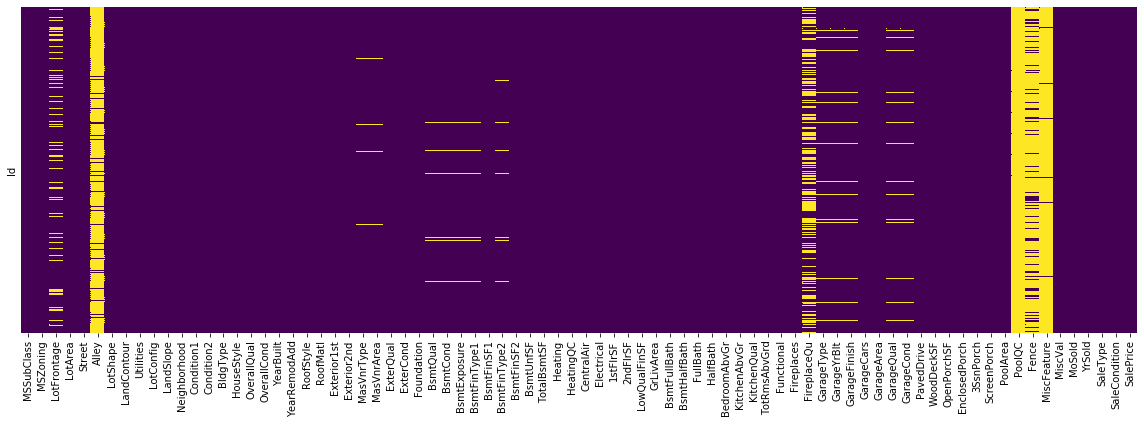

In [17]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
pd.set_option('display.max_rows', None)
print(df.iloc[0])

MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea             8450
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2003
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           196
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         GLQ
BsmtFinSF1           706
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            150
TotalBsmtSF          856
Heating             GasA
HeatingQC             Ex


In [27]:
# List of Columns are helpful and those we are going to used
df_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','SalePrice']


In [29]:
df_final = df[df_columns]
df_final.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
Id,,,,,,,,
1,8450,2003,856,854,2,3,8,208500
2,9600,1976,1262,0,2,3,6,181500
3,11250,2001,920,866,2,3,6,223500
4,9550,1915,961,756,1,3,7,140000
5,14260,2000,1145,1053,2,4,9,250000


In [30]:
df_final.isnull().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [31]:
df_final.corr()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
LotArea,1.000000,0.014228,0.299475,0.050986,0.126031,0.119690,0.190015,0.263843
YearBuilt,0.014228,1.000000,0.281986,0.010308,0.468271,-0.070651,0.095589,0.522897
1stFlrSF,0.299475,0.281986,1.000000,-0.202646,0.380637,0.127401,0.409516,0.605852
2ndFlrSF,0.050986,0.010308,-0.202646,1.000000,0.421378,0.502901,0.616423,0.319334
FullBath,0.126031,0.468271,0.380637,0.421378,1.000000,0.363252,0.554784,0.560664
BedroomAbvGr,0.119690,-0.070651,0.127401,0.502901,0.363252,1.000000,0.676620,0.168213
TotRmsAbvGrd,0.190015,0.095589,0.409516,0.616423,0.554784,0.676620,1.000000,0.533723
SalePrice,0.263843,0.522897,0.605852,0.319334,0.560664,0.168213,0.533723,1.000000


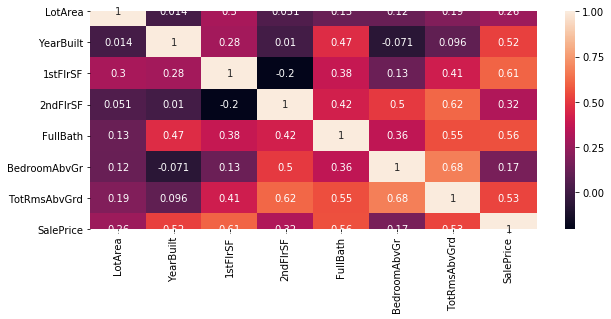

In [35]:
plt.figure(figsize=(10,4))
sns.heatmap(df_final.corr(),annot=True)

In [38]:
x = df_final.drop('SalePrice',axis=1)
y = df_final.SalePrice

x.shape, y.shape

((1460, 7), (1460,))

In [39]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

In [57]:
selector.fit(x)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [47]:
#df_final.columns[selector.get_support()]
#constant_columns = [column for column in data.columns  if column not in data.columns[var_thres.get_support()]]

#for feature in constant_columns:
 #    print(feature)
    

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [61]:
model = RandomForestRegressor(random_state=0)

In [62]:
model.fit(x,y)

RandomForestRegressor(random_state=0)

In [65]:
df_test = pd.read_csv("data/test.csv",index_col="Id")
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [67]:
#test_x = df_test[df_columns]
df_columns

['LotArea',
 'YearBuilt',
 '1stFlrSF',
 '2ndFlrSF',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'SalePrice']

In [70]:
test_x = df_test[['LotArea','YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]
test_x.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1461,11622,1961,896,0,1,2,5
1462,14267,1958,1329,0,1,3,6
1463,13830,1997,928,701,2,3,6
1464,9978,1998,926,678,2,3,7
1465,5005,1992,1280,0,2,2,5


In [73]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 7 columns):
LotArea         1459 non-null int64
YearBuilt       1459 non-null int64
1stFlrSF        1459 non-null int64
2ndFlrSF        1459 non-null int64
FullBath        1459 non-null int64
BedroomAbvGr    1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
dtypes: int64(7)
memory usage: 91.2 KB


In [74]:
model.predict(test_x)

array([121501.  , 154652.  , 182625.  , ..., 160942.02, 127412.  ,
       223235.35])

In [125]:
test_x.columns

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')

In [124]:
import pickle
# open a file, where you ant to store the data
file = open('house_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

### Model Training example 2:

In [77]:
dataset = df_final.copy()
dataset.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
Id,,,,,,,,
1,8450,2003,856,854,2,3,8,208500
2,9600,1976,1262,0,2,3,6,181500
3,11250,2001,920,866,2,3,6,223500
4,9550,1915,961,756,1,3,7,140000
5,14260,2000,1145,1053,2,4,9,250000


In [78]:
dataset.shape

(1460, 8)

In [80]:
dataset['Year_Age'] = 2020 -dataset['YearBuilt']
dataset.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice,Year_Age
Id,,,,,,,,,
1,8450,2003,856,854,2,3,8,208500,17
2,9600,1976,1262,0,2,3,6,181500,44
3,11250,2001,920,866,2,3,6,223500,19
4,9550,1915,961,756,1,3,7,140000,105
5,14260,2000,1145,1053,2,4,9,250000,20


In [84]:
dataset.isnull().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
Year_Age        0
dtype: int64

In [81]:
x_set = dataset.drop(['YearBuilt','SalePrice'],axis=1)
y_set = dataset.SalePrice

In [82]:
x_set.shape, y_set.shape

((1460, 7), (1460,))

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x_set,y_set,test_size=0.3, random_state=42)

In [88]:
x_train.shape, x_test.shape

((1022, 7), (438, 7))

In [89]:
rf_model = RandomForestRegressor(random_state=1)

In [90]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [96]:
predict = rf_model.predict(x_test)

In [93]:
mean_absolute_error(y_test,predict)

21318.800588171343

In [112]:
rf_model.feature_importances_

array([0.10129903, 0.30748854, 0.16574095, 0.00974677, 0.0162425 ,
       0.03858641, 0.3608958 ])

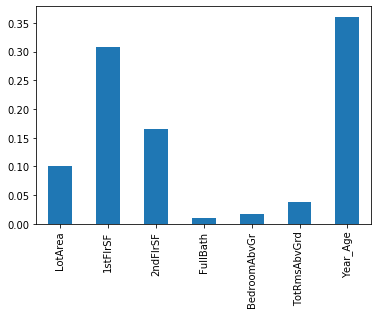

In [116]:
pd.Series(rf_model.feature_importances_,index=x_test.columns).plot(kind="bar")

In [94]:
#from sklearn.metrics import accuracy_score

In [107]:
data = pd.DataFrame({'value':y_test.astype('float'),'predict':predict})

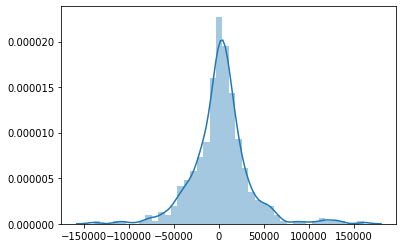

In [110]:
sns.distplot(data.value-data.predict)

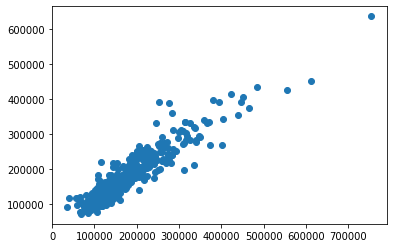

In [119]:
plt.scatter(y_test,predict)

In [121]:
x_test.columns

Index(['LotArea', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Year_Age'],
      dtype='object')

In [120]:
import pickle
# open a file, where you ant to store the data
file = open('house_price_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

In [59]:
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer

#my_pip = Pipeline(steps=[
#    ('preprocessor',SimpleImputer())
#    ('model',RandomForestRegressor(n_estimators=50, random_state=0))
#])

def get_mae(n_estimators, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for n_estimators in [5, 50, 500, 5000]:
    my_mae = get_mae(n_estimators, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(n_estimators, my_mae))